## Load data and Preprocessing data

In [ ]:
from google.colab import drive
drive.mount("/drive")

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [ ]:
import pandas as pd
from numpy import nan

data = pd.read_csv("/drive/My Drive/Colab Notebooks/CCST Survey_20221109_Text_Answers.csv")
corpus = data['security.feedback'].tolist()
print(corpus)
#drop NA values in corpus
corpus=[item for item in corpus if not(pd.isnull(item)) == True]
print(corpus)

[nan, nan, nan, nan, nan, nan, 'Was happy using the SURA VPN for off-campus access on my own equipment.', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 'The lack of admin accounts on managed computers is a major issue for people who use many different bioinformatic programs and statistical packages.  We are continually having to add new programs to our computers and the lack of admin access to a  managed computer (which is usually very slowed because of the software operating in the background) has forced me to use my personal computer or my research.', nan, nan, nan, nan, 'The 2FA through my phone is annoying but necessary for security. My complaint is that I have to use a personal device that I pay for in order to access my work equipment.', "Stop forcing mandatory password changes. It's no longer considered best practices at many institutions ", nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 'no', nan, nan, nan, nan, 'I travel internati

In [ ]:
#print size in corpus

print('size of dissatisfation texts is', len(corpus))

size of dissatisfation texts is 322


# KMeans


tfidf representation

In [ ]:
# tfidf representation
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(corpus)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
print(len(tfidf_vectorizer.vocabulary_))

755


In [ ]:
from sklearn.cluster import KMeans

K = 5
tfidf_model = KMeans(n_clusters=K, random_state=0)
tfidf_model.fit(tfidf)
labels=tfidf_model.labels_.tolist() 

In [ ]:
#  print cluster sizes
def print_cluster_sizes(model):
  cnt_perCluster = {}
  for c in model.labels_:
    cnt_perCluster[c] = cnt_perCluster.get(c, 0)+1
  print(cnt_perCluster)

In [ ]:
print_cluster_sizes(tfidf_model)

{4: 44, 2: 152, 0: 53, 3: 37, 1: 36}


In [ ]:
# print documents closest to each centroid
import numpy as np
def print_docs_closest_to_centroids(model, vec, n):
  K = len(model.cluster_centers_)
  for j in range(K):
    d = model.transform(vec)[:, j]
    idx = np.argsort(d)[:n]
    print('\n\n======cluster #', j)
    for i in idx:
      print(corpus[i])

In [ ]:
print_docs_closest_to_centroids(tfidf_model, tfidf, 5)



======cluster # 0
No
No.
No 
I do not.
none


======cluster # 1
NO
None that would be applicable
No 
I do not.
No.


======cluster # 2
None that would be applicable
none
No
NO.
No 


======cluster # 3
No.
none
No.
N
none


======cluster # 4
No feedback
I do not.
No
NO.
None that would be applicable


In [ ]:
# Plot the inertia graph
import matplotlib.pyplot as plt
def plot_inertia(inertia_list):
  plt.plot(range(1,len(inertia_list)+1), inertia_list, 'bx-')
  plt.xlabel('Values of K')
  plt.ylabel('Inertia')
  plt.title('The Elbow Method using Inertia')
  plt.show()

In [ ]:
# use the Elbow method to determine the best k
def elbow(m, corpus):
  inertia_lst = []
  for i in range(1,m+1):
    model = KMeans(n_clusters=i)
    model.fit(corpus)
    
    inertia=model.inertia_
    inertia_lst.append(inertia)
  plot_inertia(inertia_lst)

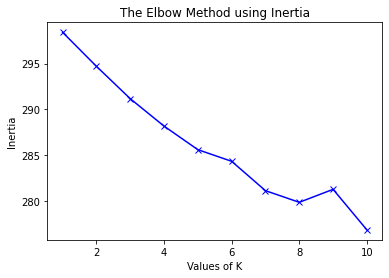

In [ ]:
elbow(10, tfidf)

In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


unigram representation

In [ ]:
# unigram representation
from sklearn.feature_extraction.text import CountVectorizer
unigram_count_vectorizer = CountVectorizer(encoding='latin-1', binary=False, stop_words='english')
uni = unigram_count_vectorizer.fit_transform(corpus)
uni_feature_names = unigram_count_vectorizer.get_feature_names_out()
print(len(unigram_count_vectorizer.vocabulary_))

1805


In [ ]:
from sklearn.cluster import KMeans

K = 5
uni_model = KMeans(n_clusters=K, random_state=0)
uni_model.fit(uni)
labels=uni_model.labels_.tolist() 

In [ ]:
#  print cluster sizes
def print_cluster_sizes(model):
  cnt_perCluster = {}
  for c in model.labels_:
    cnt_perCluster[c] = cnt_perCluster.get(c, 0)+1
  print(cnt_perCluster)

In [ ]:
# print documents closest to each centroid
import numpy as np
def print_docs_closest_to_centroids(model, vec, n):
  K = len(model.cluster_centers_)
  for j in range(K):
    d = model.transform(vec)[:, j]
    idx = np.argsort(d)[:n]
    print('\n\n======cluster #', j)
    for i in idx:
      print(corpus[i])

In [ ]:
print_docs_closest_to_centroids(uni_model, uni, 5)



======cluster # 0
No 
No
none
NO.
NO


======cluster # 1
Not at this time.
not at this time
No 
NO
NO.


======cluster # 2
Security is a black hole....I do not know who to contact if I have a security issue.
I believe we can always use a refresher/updating on security issues.
None
No.
none


======cluster # 3
I have gotten to the point where I would rather buy my own laptop than work through the university's.  When I get a new computer from ITS, I lose significant usability and even worse, I have lost significant work.  When apple started offering automatic backup of Word docs to the icloud, it was a godsend to me--so easy not to manually back up-- but when I got a new computer was only saving to the HD not to icloud, paths got confused, and it lost a significant article I was writing.  I finished that article on Google Docs so as not to risk losing it, but ultimately I had to come back to Word for the editing and proofing stages. I do not like the interface with One Drive at all. I 

In [ ]:
# Plot the inertia graph
import matplotlib.pyplot as plt
def plot_inertia(inertia_list):
  plt.plot(range(1,len(inertia_list)+1), inertia_list, 'bx-')
  plt.xlabel('Values of K')
  plt.ylabel('Inertia')
  plt.title('The Elbow Method using Inertia')
  plt.show()

In [ ]:
# use the Elbow method to determine the best k
def elbow(m, corpus):
  inertia_lst = []
  for i in range(1,m+1):
    model = KMeans(n_clusters=i)
    model.fit(corpus)
    
    inertia=model.inertia_
    inertia_lst.append(inertia)
  plot_inertia(inertia_lst)

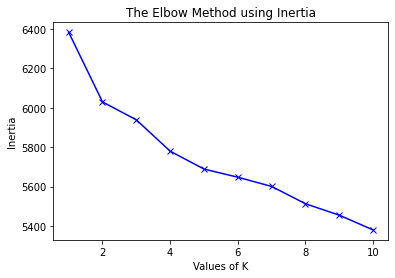

In [ ]:
elbow(10, uni)

# LDA


In [ ]:
!pip install bertopic
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 90 kB 6.3 MB/s 
     |████████████████████████████████| 5.2 MB 45.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 85 kB 4.7 MB/s 
     |████████████████████████████████| 88 kB 8.1 MB/s 
     |████████████████████████████████| 636 kB 72.8 MB/s 
     |████████████████████████████████| 5.5 MB 63.1 MB/s 
     |████████████████████████████████| 1.3 MB 47.8 MB/s 
     |████████████████████████████████| 182 kB 115.1 MB/s 
     |████████████████████████████████| 7.6 MB 58.8 MB/s 
     |████████████████████████████████| 1.1 MB 62.9 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp37-cp37m-linux_x86_64.whl size=2340669 sha256=c1a0ec5f267557a9e24a7d08da06b94e51c1587dd693994f271d0a8a0ea67af8
  Stored in directory: /root/.cach

In [ ]:
#LDA

# removing stopwords usually improve topic models
# stoplist is often customized to include more domain-specific topic words

from sklearn.feature_extraction import text

added_stopwords = frozenset(['just', 'did'])
my_stopwords = text.ENGLISH_STOP_WORDS.union(added_stopwords)
print(len(my_stopwords))
print(my_stopwords)

320
frozenset({'get', 'they', 'via', 'once', 'whenever', 'would', 'cannot', 'still', 'detail', 'them', 'since', 'becoming', 'whole', 'will', 'from', 'again', 'enough', 'when', 'seem', 'did', 'cry', 'please', 'hereby', 'anyhow', 'thin', 'whereby', 'to', 'or', 'same', 'three', 'become', 'of', 'may', 'your', 'upon', 'what', 'another', 'yours', 'behind', 'former', 'below', 'among', 'fill', 'inc', 'un', 'co', 'whither', 'without', 'con', 'those', 'during', 'sixty', 'hundred', 'ourselves', 'front', 'wherever', 'bill', 'there', 'noone', 'amount', 'formerly', 'why', 'third', 'is', 'no', 'at', 'throughout', 'these', 'four', 'put', 'any', 'her', 'onto', 'this', 'never', 'therefore', 'do', 'within', 'etc', 'yourselves', 'whose', 'fifty', 'somehow', 'see', 'six', 'nevertheless', 'now', 'both', 'besides', 'she', 'for', 'one', 'while', 'i', 'though', 'am', 'nobody', 'found', 'afterwards', 'two', 'fire', 'some', 'somewhere', 'anything', 'side', 'always', 'ltd', 'nine', 'ours', 'our', 'an', 'above', '

Tf-idf representation

In [ ]:
# tfidf usually help improve topic models

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words=my_stopwords)
tfidf = tfidf_vectorizer.fit_transform(corpus)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
print(len(tfidf_vectorizer.vocabulary_))

753


In [ ]:
# call the LDA algorithm to fit a topic model, and transform all documents to their topic distrinbutions

from sklearn.decomposition import NMF, LatentDirichletAllocation
no_topics = 5

# Run LDA
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=10, learning_method='online', learning_offset=50.,random_state=0)
lda_z = lda.fit_transform(tfidf)

In [ ]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        no_top_words = 5
no_top_words = 5
display_topics(lda, tfidf_feature_names, no_top_words)

Topic 0:
staff years training hacked love
Topic 1:
know thanks adequate phishing accessibility
Topic 2:
trainings mandatory frustrating work comment
Topic 3:
team factor repeated constraints authentication
Topic 4:
security use time issues training


In [ ]:
# now examine the topic distribution in each document
# since each document is considered a mixture of all topics with different probabilities

# lda_z stores the prob distribution for each document
# for the 20newsgroup dataset, it is a 11314*15 matrix
# 11314 documents, 15 topics

# examine document #5 (index starts at 0)
# high prob for topics #13 (index starts at 0), with probs 0.55
# the document reads as related to religion

print(lda_z.shape)
print(lda_z[0])
#print(documents.shape)

(322, 5)
[0.05645278 0.05609719 0.05726683 0.05585422 0.77432897]


Unigram representation

In [ ]:
# unigram representation
from sklearn.feature_extraction.text import CountVectorizer
unigram_count_vectorizer = CountVectorizer(encoding='latin-1', binary=False, stop_words='english')
uni = unigram_count_vectorizer.fit_transform(corpus)
uni_feature_names = unigram_count_vectorizer.get_feature_names_out()
print(len(unigram_count_vectorizer.vocabulary_))

1805


In [ ]:
# call the LDA algorithm to fit a topic model, and transform all documents to their topic distrinbutions

from sklearn.decomposition import NMF, LatentDirichletAllocation
no_topics = 5

# Run LDA
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=10, learning_method='online', learning_offset=50.,random_state=0)
lda_z = lda.fit_transform(uni)

In [ ]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        no_top_words = 5
no_top_words = 5
display_topics(lda, uni_feature_names, no_top_words)

Topic 0:
work longer frustrating slows passwords
Topic 1:
university using concerning staff surrounding
Topic 2:
security use password log issues
Topic 3:
security training work like computer
Topic 4:
use access work security software


In [ ]:
print(lda_z.shape)
print(lda_z[0])
#print(documents.shape)

(322, 5)
[0.02507113 0.02520266 0.02567555 0.02554935 0.89850131]


# BERTopic

In [ ]:
!pip install bertopic
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# obtain topic modelling results
print(len(corpus))

from bertopic import BERTopic
topic_model = BERTopic(embedding_model="all-MiniLM-L12-v2", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(corpus)

322


Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/573 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/134M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/352 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Batches:   0%|          | 0/11 [00:00<?, ?it/s]

2022-11-28 22:53:39,362 - BERTopic - Transformed documents to Embeddings
2022-11-28 22:53:45,962 - BERTopic - Reduced dimensionality
2022-11-28 22:53:45,989 - BERTopic - Clustered reduced embeddings


In [ ]:
# After generating topics and their probabilities, we can access the frequent topics that were generated
# -1 refers to all outliers and should typically be ignored. 

freq = topic_model.get_topic_info(); 
num_topics = len(freq) -1
print(num_topics)
freq.head(num_topics)

1


Topic  Count             Name
0      0    301  0_to_the_and_it

In [ ]:
for i in range(num_topics):
  print("\n== Representative documents in cluster #", i)
  print(topic_model.get_representative_docs(i))


== Representative documents in cluster # 0
["I don't think I see any information on updates to security. I see occasional emails when there is Phishing and know not to click on suspicious email. I don't think I see much else.", "I am using my personal phone for the two factor authentication - I see no way around this and understand the need...though if my personal phone is needed for work, we should get some reimbursement of 'break' on our Verizon bills!", 'I find the rds system difficult to work with from my home and most days I get kicked out of the system at least once and some days several times.']


In [ ]:
topic_model.find_topics("login",top_n=20)

([0, 1], [0.30547688089771297, 0.28415033927806344])

In [ ]:
topic_model.get_topic(1)  # Select the most frequent topic

[('no', 1.0826659447731068),
 ('none', 0.5938537492257969),
 ('not', 0.25157002053035915),
 ('know', 0.24230015579721895),
 ('to', 0.2185907385329002),
 ('at', 0.21168381919910428),
 ('this', 0.20988532204614804),
 ('time', 0.20901311002523895),
 ('would', 0.20041958059516563),
 ('nothing', 0.19168197305710083)]

In [ ]:
topic_model.visualize_distribution(probs[2], min_probability=0.005)

In [ ]:
topic_model.visualize_hierarchy(top_n_topics=50)

In [ ]:
topic_model.visualize_barchart(top_n_topics=10)

## SBERT


In [ ]:
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sentence_transformers import SentenceTransformer
embedder = SentenceTransformer('all-MiniLM-L6-v2')

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [ ]:
sbert_embeddings = embedder.encode(corpus)

In [ ]:
K = 5  # change number of cluster if applicable
from sklearn.cluster import KMeans
sbert_model = KMeans(n_clusters=K, random_state=1337)
sbert_model.fit(sbert_embeddings)
labels=sbert_model.labels_.tolist()  # Save cluster labels in a separate list

In [ ]:
#  print cluster sizes
def print_cluster_sizes(model):
  cnt_perCluster = {}
  for c in model.labels_:
    cnt_perCluster[c] = cnt_perCluster.get(c, 0)+1
  print(cnt_perCluster)
print_cluster_sizes(sbert_model)

{3: 89, 0: 72, 2: 21, 4: 79, 1: 61}


In [ ]:
# print documents closest to each centroid
import numpy as np
def print_docs_closest_to_centroids(model, vec, n):
  K = len(model.cluster_centers_)
  for j in range(K):
    d = model.transform(vec)[:, j]
    idx = np.argsort(d)[:n]
    print('\n\n======cluster #', j)
    for i in idx:
      print(corpus[i])
print_docs_closest_to_centroids(sbert_model, sbert_embeddings, 5)



======cluster # 0
Two-factor authentication is extremely inconvenient. If I happen to leave my phone at home or if it's not working properly, then I'm unable to do my job.
its annoying to have to change your password every year; it was fabulous to have integrated security sign-ins so you only have to sign in once and you can get access to the sites/progams/services you need
I know that 2 factor authentication is important, but sometimes it does delay be getting work done because I have to re-login more often than I think I should. 
Sometimes the 2-factor authentication is annoying as it asks for repeated verification on the same device.
The worst thing that ever happened was when we had to two factor authenticate every time we wanted to log in anywhere, and we didn't stay logged in.  Life is much better now that I log in once and don't have to do two factor authentication as much.  


======cluster # 1
ITS staff are excellent with assisting/ Troubleshooting, however I find that annua